## Cleaning NYC Weather data - 2019 

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
file_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019.csv"
df = pd.read_csv(file_path)

In [6]:
# Display first few rows
df.head()

,station,date,lon,lat,tmpf,relh,sped,p01i,vsby
0,JRB,1/1/2019,-74.0090,40.7012,M,M,6.90,0.01,4
1,JRB,1/1/2019,-74.0090,40.7012,M,M,10.35,0.02,3.5
2,JRB,1/1/2019,-74.0090,40.7012,M,M,8.05,0.04,3.5
3,NYC,1/1/2019,-73.9693,40.7790,44,92.62,0.00,0.04,2.5
4,JRB,1/1/2019,-74.0090,40.7012,M,M,6.90,0.04,3.5


In [8]:
# Replace 'M' as missing value indicator
df.replace('M', np.nan, inplace=True)

In [10]:
# Display first few rows
df.head()

,station,date,lon,lat,tmpf,relh,sped,p01i,vsby
0,JRB,1/1/2019,-74.0090,40.7012,NaN,NaN,6.90,0.01,4
1,JRB,1/1/2019,-74.0090,40.7012,NaN,NaN,10.35,0.02,3.5
2,JRB,1/1/2019,-74.0090,40.7012,NaN,NaN,8.05,0.04,3.5
3,NYC,1/1/2019,-73.9693,40.7790,44,92.62,0.00,0.04,2.5
4,JRB,1/1/2019,-74.0090,40.7012,NaN,NaN,6.90,0.04,3.5


In [12]:
# Basic data overview
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121647 entries, 0 to 121646
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   station  121647 non-null  object 
 1   date     121647 non-null  object 
 2   lon      121647 non-null  float64
 3   lat      121647 non-null  float64
 4   tmpf     21576 non-null   object 
 5   relh     21574 non-null   object 
 6   sped     121647 non-null  float64
 7   p01i     28205 non-null   object 
 8   vsby     97625 non-null   object 
dtypes: float64(3), object(6)
memory usage: 8.4+ MB


In [14]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
station         0
date            0
lon             0
lat             0
tmpf       100071
relh       100073
sped            0
p01i        93442
vsby        24022
dtype: int64


In [16]:
# Drop duplicate rows if any
df = df.drop_duplicates()

In [18]:
# Drop completely empty columns
df = df.dropna(axis=1, how='all')

In [20]:
# Convert numeric columns where possible
df = df.apply(pd.to_numeric, errors='ignore')

In [22]:
# Fill or drop missing values depending on column type
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [24]:
# Ensure all string data is stripped and lowercased
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [26]:
# Convert date columns if exist
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [28]:
# Final shape and preview
print("\n--- Cleaned Data Preview ---")
print(df.shape)
df.head()



--- Cleaned Data Preview ---
(30823, 9)


,station,date,lon,lat,tmpf,relh,sped,p01i,vsby
0,jrb,2019-01-01,-74.0090,40.7012,57.0,69.52,6.90,0.01,4.0
1,jrb,2019-01-01,-74.0090,40.7012,57.0,69.52,10.35,0.02,3.5
2,jrb,2019-01-01,-74.0090,40.7012,57.0,69.52,8.05,0.04,3.5
3,nyc,2019-01-01,-73.9693,40.7790,44.0,92.62,0.00,0.04,2.5
4,jrb,2019-01-01,-74.0090,40.7012,57.0,69.52,6.90,0.04,3.5


In [30]:
# Save cleaned dataset
output_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")


Cleaned dataset saved to: D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned.csv


## Calculating Avg for each feature in cleaned weather data 2029

In [33]:
# Load the cleaned dataset
file_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned.csv"
df = pd.read_csv(file_path)

In [35]:
# Convert date column properly again after CSV load
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [37]:
# Print debug columns
print("\n--- Columns in Dataset ---")
print(df.columns.tolist())


--- Columns in Dataset ---
['station', 'date', 'lon', 'lat', 'tmpf', 'relh', 'sped', 'p01i', 'vsby']


In [39]:
# Explicitly define column names
# Replace with actual column names if they differ
station_column = 'station'
date_column = 'date'

In [41]:
# Ensure datetime format
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

In [43]:
# Group by date and station to get daily averages
df_avg = df.groupby([date_column, station_column]).mean(numeric_only=True).reset_index()

In [45]:
# Build full date range for 2019 because we don't have some dates with their corresponding information (weather features) in our dataset.
date_range = pd.date_range(start='2019-01-01', end='2019-12-31')
stations = df[station_column].unique()

In [47]:
# Create complete date-station combination
date_station_index = pd.MultiIndex.from_product([date_range, stations], names=[date_column, station_column])
df_full = pd.DataFrame(index=date_station_index).reset_index()

In [49]:
# Merge to fill in missing combinations
df_merged = pd.merge(df_full, df_avg, on=[date_column, station_column], how='left')

In [51]:
# Fill missing weather values by forward and backward filling
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
df_merged[numeric_cols] = df_merged.groupby(station_column)[numeric_cols].transform(lambda x: x.ffill().bfill())

In [53]:
# Save the completed average feature dataset
avg_output_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned_Avg_Features_per-day.csv"
df_merged.to_csv(avg_output_path, index=False)
print(f"\n Completed averaged dataset saved to: {avg_output_path}")


 Completed averaged dataset saved to: D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned_Avg_Features_per-day.csv


## Mapping Weather Data on NYC Grid | Keeping all the features Alternative 1

In [141]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from scipy.spatial import KDTree
import random
from tqdm import tqdm
import os

In [123]:
# Load weather data and grid data
weather_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned.csv"
grid_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Grid_Info.csv"

weather_df = pd.read_csv(weather_path)
grid_df = pd.read_csv(grid_path)

In [125]:
# Normalize grid column names
grid_df.columns = [col.strip().lower() for col in grid_df.columns]

In [127]:
# Parse dates and prepare
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.sort_values(by=['station', 'date'])

In [129]:
# Get all days and grid IDs
dates = pd.date_range(start='2019-01-01', end='2019-12-31')
grid_df['grid_id'] = grid_df.index + 1

In [131]:
# Identify lat/lon columns
lat_col = [col for col in grid_df.columns if 'lat' in col][0]
lon_col = [col for col in grid_df.columns if 'lon' in col][0]

In [133]:
# Prepare station coordinates and build KDTree
station_coords = weather_df[['station', 'lon', 'lat']].drop_duplicates()
station_coord_array = station_coords[['lat', 'lon']].to_numpy()
station_tree = KDTree(station_coord_array)
station_labels = station_coords['station'].values

In [135]:
# Group weather data by (station, date) for fast lookup
weather_lookup = {(s, d): g for (s, d), g in weather_df.groupby(['station', 'date'])}

In [137]:
# Precompute closest station for each grid
grid_locations = grid_df[[lat_col, lon_col]].to_numpy()
_, closest_station_indices = station_tree.query(grid_locations)
closest_stations = station_labels[closest_station_indices]
grid_df['closest_station'] = closest_stations

In [143]:
# Build final output list efficiently
output_records = []

for date in tqdm(dates, desc="Processing daily weather for grids"):
    station_day_groups = {
        station: weather_lookup.get((station, date), pd.DataFrame())
        for station in station_labels
    }
    
    for grid_idx, grid_row in grid_df.iterrows():
        grid_id = grid_row['grid_id']
        station = grid_row['closest_station']
        day_weather = station_day_groups.get(station)

        if day_weather is not None and not day_weather.empty:
            sampled = day_weather.sample(1, random_state=random.randint(0, 10000)).copy()
            sampled['grid_id'] = grid_id
            output_records.append(sampled)

Processing daily weather for grids: 100%|████████████████████████████████████████████| 365/365 [49:35<00:00,  8.15s/it]


In [145]:
# Combine and save result
grid_weather_df = pd.concat(output_records, ignore_index=True)
out_path = r"D:\\SVM\\Edit 4 SVM\\weather_map_grid_365days.csv"
os.makedirs(os.path.dirname(out_path), exist_ok=True)
grid_weather_df.to_csv(out_path, index=False)
print(f"\n✅ Grid-mapped weather data saved to: {out_path}")


✅ Grid-mapped weather data saved to: D:\\SVM\\Edit 4 SVM\\weather_map_grid_365days.csv


## Defining Good Weather and Bad Weather 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the cleaned weather dataset
weather_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned.csv"
df = pd.read_csv(weather_path)

In [6]:
# Convert date if necessary
df['date'] = pd.to_datetime(df['date'])

In [32]:
# Ensure weather columns are numeric (handle 'M', 'T', etc.)
cols_to_numeric = ['tmpf', 'relh', 'sped', 'p01i', 'vsby']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [34]:
# Adjusted weather classification logic for NYC context
def classify_weather(row):
    good = (
        50 <= row['tmpf'] <= 90 and
        25 <= row['relh'] <= 70 and
        row['sped'] <= 20 and
        row['p01i'] <= 0.01 and
        row['vsby'] >= 3
    )
    return 'good' if good else 'bad'

In [36]:
# Apply classification
df['weather_class'] = df.apply(classify_weather, axis=1)

In [38]:
# Save updated dataset
out_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned_with_class.csv"
df.to_csv(out_path, index=False)
print(f"\n Weather classification added and saved to: {out_path}")



 Weather classification added and saved to: D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned_with_class.csv


In [42]:
# Count and visualize daily distribution of good/bad weather
weather_counts = df.groupby(['date', 'weather_class']).size().unstack(fill_value=0)

<Figure size 1400x600 with 0 Axes>

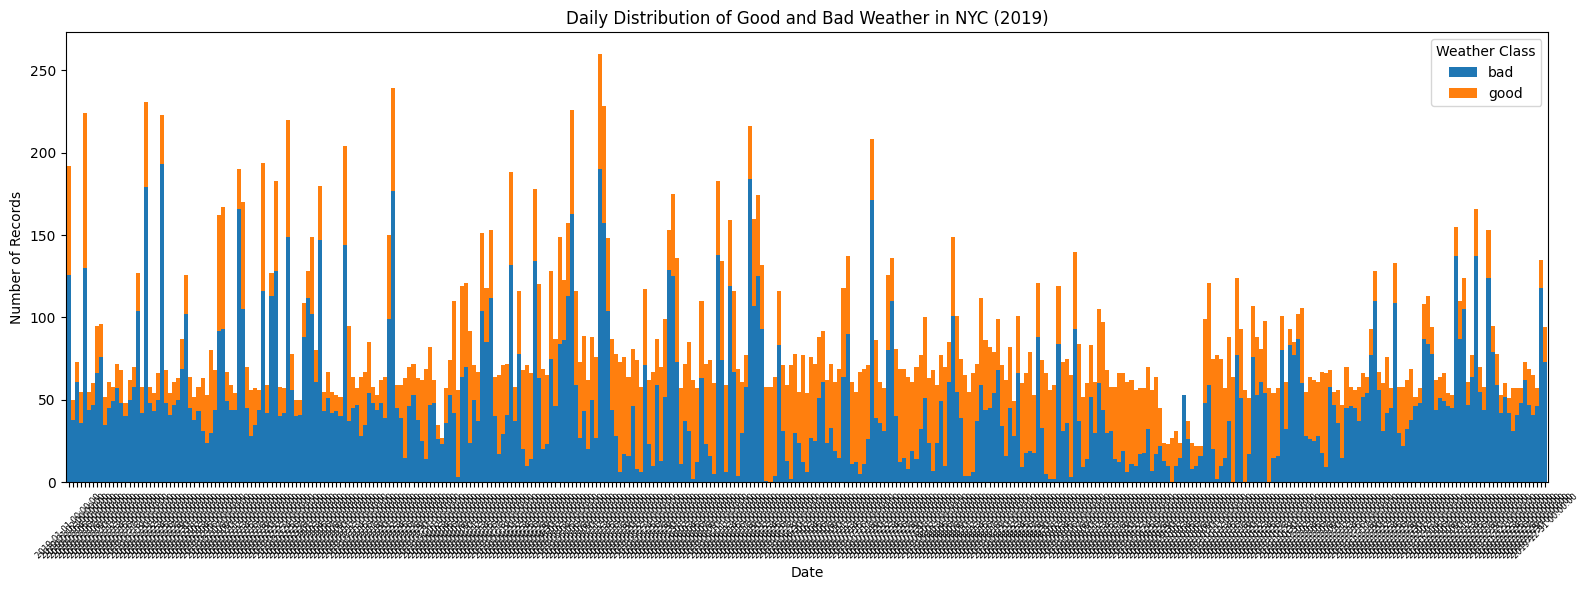

In [44]:
plt.figure(figsize=(14, 6))
weather_counts.plot(kind='bar', stacked=True, width=1, figsize=(16, 6))
plt.title('Daily Distribution of Good and Bad Weather in NYC (2019)')
plt.ylabel('Number of Records')
plt.xlabel('Date')
plt.xticks(rotation=45, fontsize=6)
plt.legend(title='Weather Class')
plt.tight_layout()
plt.show()

In [46]:
# Interpretation:
# Each bar shows the count of weather reports classified as 'good' or 'bad' for that day.
# Taller bars mean more total observations that day.
# More blue (good) in the bar means better weather conditions that day.
# Red (bad) indicates unfavorable weather.
# This chart helps us see how weather conditions changed across the year.
# We can easily identify long stretches of good or bad weather visually.

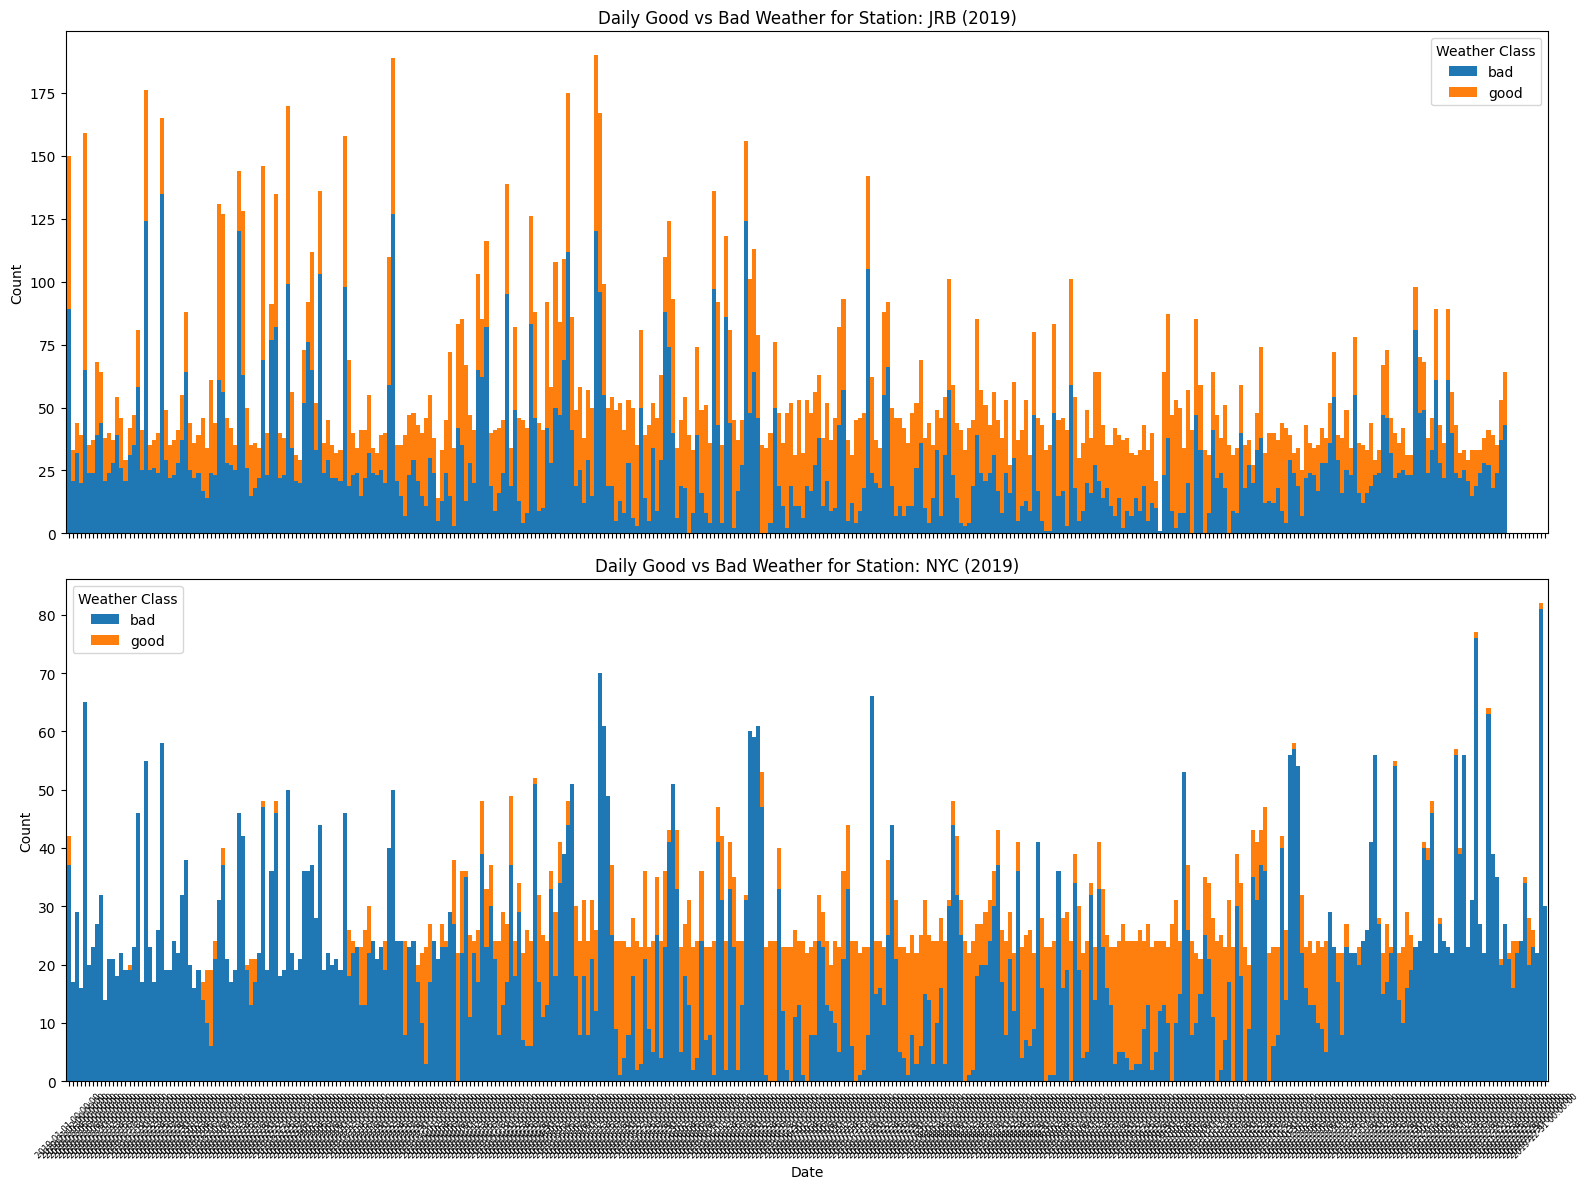

In [48]:
# Count and visualize daily distribution of good/bad weather for each station
stations = df['station'].unique()

fig, axes = plt.subplots(len(stations), 1, figsize=(16, 6 * len(stations)), sharex=True)

for i, station in enumerate(stations):
    station_df = df[df['station'] == station]
    station_counts = station_df.groupby(['date', 'weather_class']).size().unstack(fill_value=0)

    station_counts.plot(kind='bar', stacked=True, width=1, ax=axes[i])
    axes[i].set_title(f"Daily Good vs Bad Weather for Station: {station.upper()} (2019)")
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Weather Class')
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=6)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [50]:
# Interpretation:
# Each subplot shows how many weather records at that station were classified as 'good' or 'bad' per day.
# This allows comparison between stations over the same time period.
# We can spot if one station generally had better weather days than the other or showed more variability.

## Mapping Weather on Grid | Considering Good Weather and Bad Wether, Alternative 2

In [57]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Load weather and grid data
weather_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Weather_2019_cleaned_with_class_without features.csv"
grid_path = r"D:\\SVM\\Edit 4 SVM\\NYC_Grid_Info.csv"

weather_df = pd.read_csv(weather_path)
grid_df = pd.read_csv(grid_path)

In [7]:
# Parse date
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [21]:
# Precompute grid centers
grid_df['grid_lat'] = (grid_df['Min Lat'] + grid_df['Max Lat']) / 2
grid_df['grid_lon'] = (grid_df['Min Long'] + grid_df['Max Long']) / 2

In [23]:
# Station coordinates
stations = weather_df[['station', 'lat', 'lon']].drop_duplicates().reset_index(drop=True)
station_coords = stations[['lat', 'lon']].to_numpy()

In [25]:
# Grid centers
grid_coords = grid_df[['grid_lat', 'grid_lon']].to_numpy()

In [27]:
# Compute closest station index for each grid
closest_station_idx = np.array([
    np.argmin([geodesic(gc, sc).km for sc in station_coords]) for gc in grid_coords
])

grid_df['closest_station'] = stations.loc[closest_station_idx, 'station'].values

In [29]:
# Create a lookup dictionary for weather class
weather_df['weather_class_bin'] = (weather_df['weather_class'] == 'good').astype(int)
weather_lookup = weather_df.groupby(['station', 'date'])['weather_class_bin'].apply(list).to_dict()

In [31]:
# Generate day column names and grid IDs
dates = pd.date_range('2019-01-01', '2019-12-31')
day_columns = [f"Day_{i:03d}" for i in range(1, 366)]

In [33]:
# Create empty result matrix
grid_ids = grid_df['Grid ID'].values
result_matrix = np.zeros((len(grid_ids), len(dates)), dtype=np.uint8)

In [35]:
# Vectorized assignment using NumPy and lookup
grid_station_map = grid_df['closest_station'].values

station_to_idx = {s: np.where(grid_station_map == s)[0] for s in np.unique(grid_station_map)}

for day_idx, date in enumerate(dates):
    for station, indices in station_to_idx.items():
        val_list = weather_lookup.get((station, date))
        val = np.random.choice(val_list) if val_list else np.random.choice(weather_df.loc[weather_df['station'] == station, 'weather_class_bin'])
        result_matrix[indices, day_idx] = val

In [37]:
# Assemble final DataFrame
grid_result = pd.DataFrame(result_matrix, columns=day_columns)
grid_result.insert(0, 'Grid ID', grid_ids)

In [41]:
# Save final table
out_path = r"D:\\SVM\\Edit 4 SVM\\weather_grid_good_bad_matrix.csv"
grid_result.to_csv(out_path, index=False)
print(f"\n Grid-to-day weather matrix saved to: {out_path}")


 Grid-to-day weather matrix saved to: D:\\SVM\\Edit 4 SVM\\weather_grid_good_bad_matrix.csv


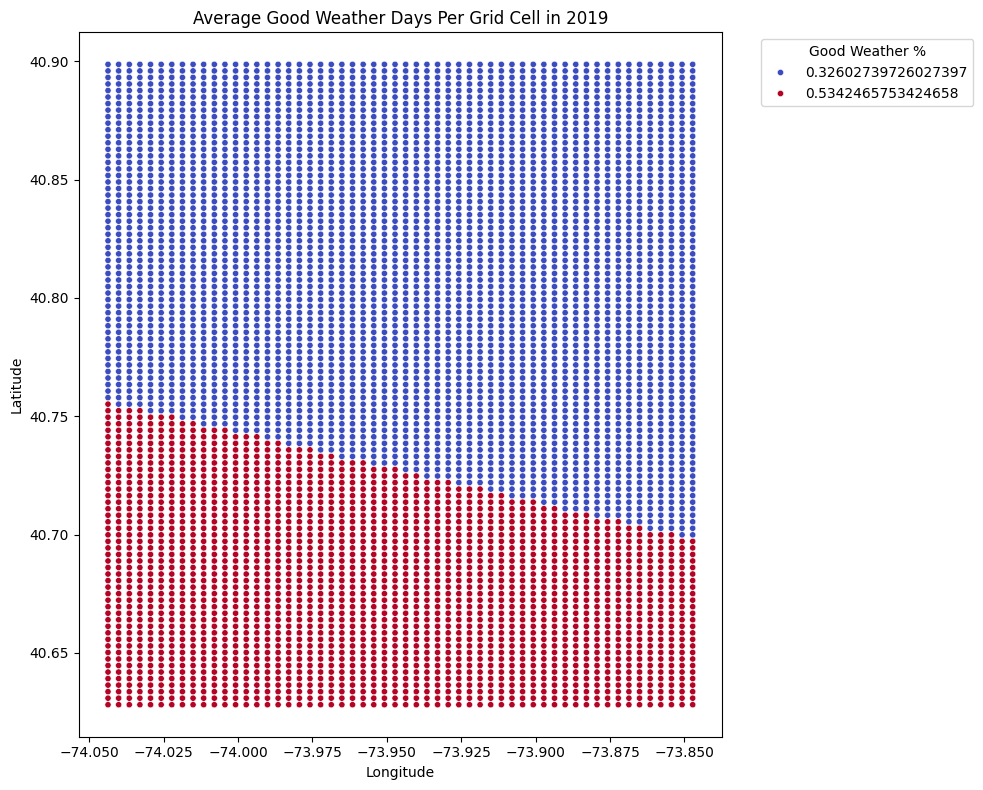

In [47]:
# --------------------------
# Visualization Section
# --------------------------
# Compute average good-weather ratio per grid
average_good_weather = grid_result.drop(columns='Grid ID').mean(axis=1)

# Add to grid_df and plot heatmap by lat/lon
grid_df['avg_good_weather'] = average_good_weather
plt.figure(figsize=(10, 8))
sns.scatterplot(data=grid_df, x='grid_lon', y='grid_lat', hue='avg_good_weather', palette='coolwarm', s=20)
plt.title('Average Good Weather Days Per Grid Cell in 2019')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Good Weather %', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
# Recalculate grid and station coordinates
grid_df['grid_lat'] = (grid_df['Min Lat'] + grid_df['Max Lat']) / 2
grid_df['grid_lon'] = (grid_df['Min Long'] + grid_df['Max Long']) / 2
stations = weather_df[['station', 'lat', 'lon']].drop_duplicates().reset_index(drop=True)

grid_coords = grid_df[['grid_lat', 'grid_lon']].to_numpy()
station_coords = stations[['lat', 'lon']].to_numpy()
distance_matrix = np.array([
    [geodesic(gc, sc).km for sc in station_coords] for gc in grid_coords
])

# Compute and normalize IDW weights
idw_weights = 1 / np.power(distance_matrix, 2)
idw_weights = idw_weights / idw_weights.sum(axis=1, keepdims=True)

idw_weights.shape

(5544, 2)

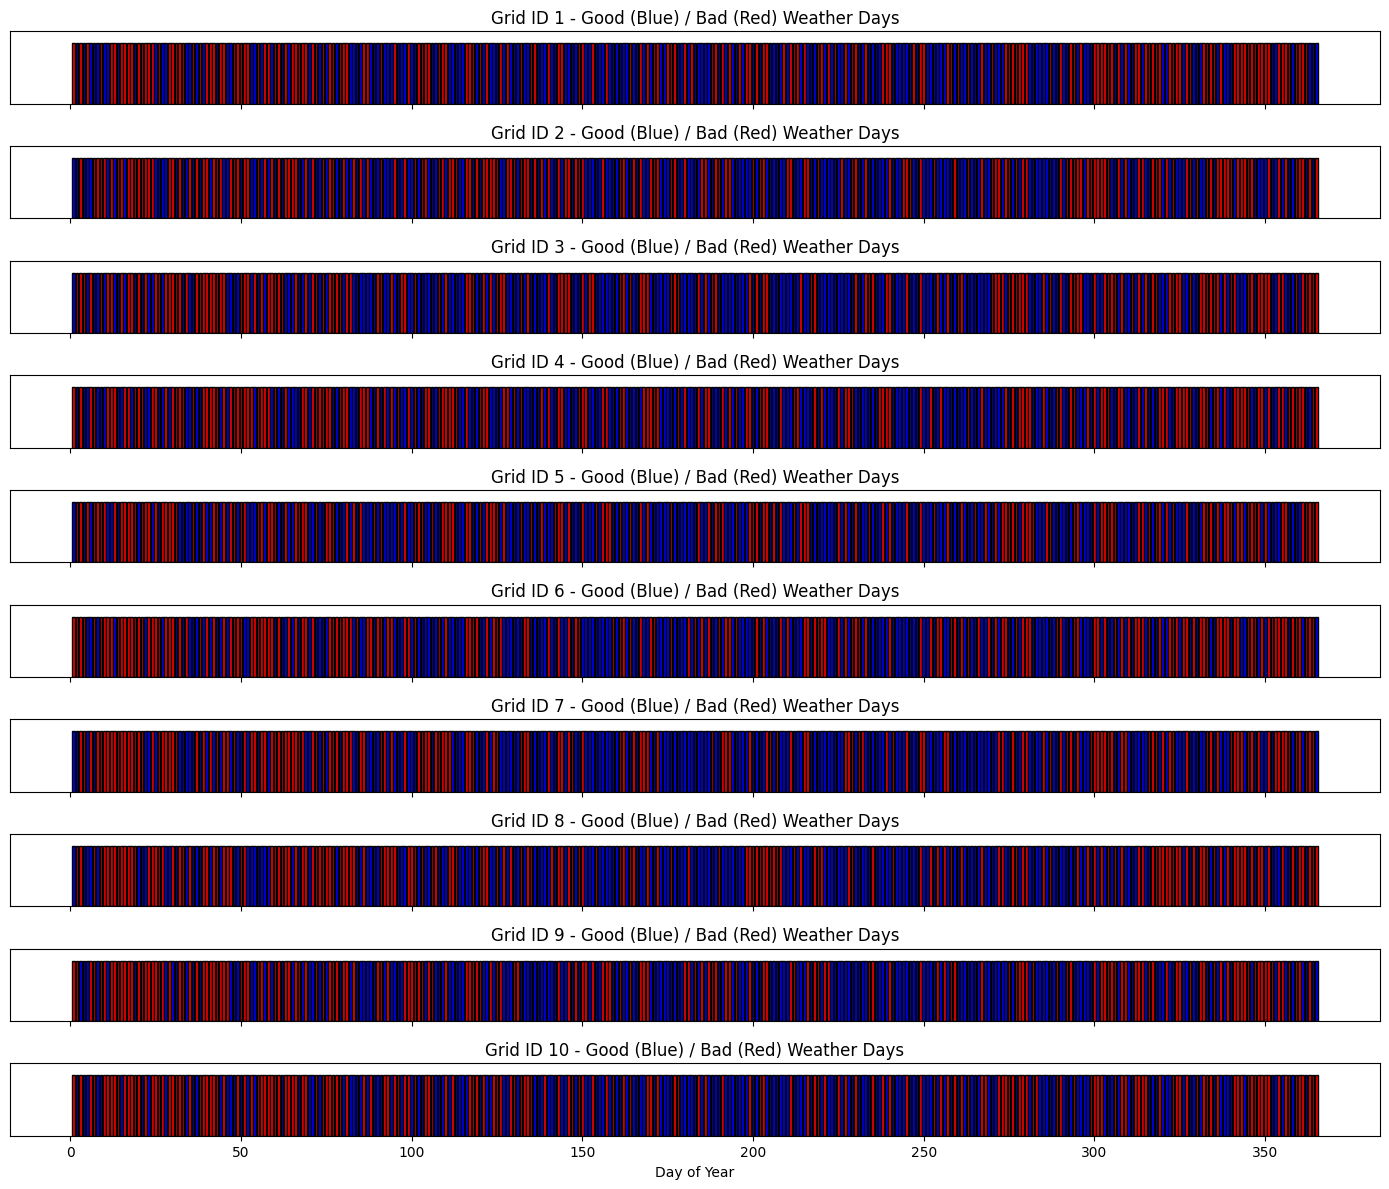

In [63]:
# Visualize weather color bar for first 10 grid cells
fig, axes = plt.subplots(10, 1, figsize=(14, 12), sharex=True)

threshold = 0.75

for grid_index in range(10):
    weighted_values = np.array([
        idw_weights[grid_index] @ np.array([
            np.random.choice(weather_lookup.get((station, date), [np.random.choice(weather_df.loc[weather_df['station'] == station, 'weather_class_bin'])]))
            for station in stations['station']
        ]) for date in dates
    ])
    colors = ['blue' if val >= threshold else 'red' for val in weighted_values]
    axes[grid_index].bar(range(1, 366), [1] * 365, color=colors, edgecolor='black')
    grid_id = grid_result.loc[grid_index, 'Grid ID']
    axes[grid_index].set_title(f'Grid ID {int(grid_id)} - Good (Blue) / Bad (Red) Weather Days')
    axes[grid_index].set_ylim(0, 1.2)
    axes[grid_index].set_yticks([])

plt.xlabel("Day of Year")
plt.tight_layout()
plt.show()

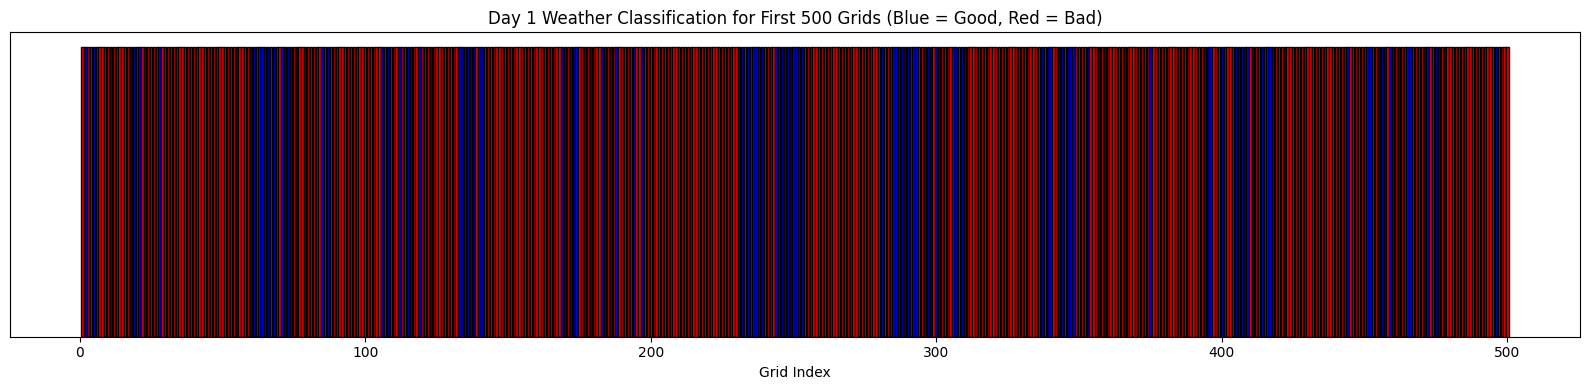

In [67]:
# Show binary weather distribution for first 500 grids on day 1
day_idx = 0
day_1_values = []

for grid_index in range(1000):
    weighted_val = idw_weights[grid_index] @ np.array([
        np.random.choice(weather_lookup.get((station, dates[day_idx]), [np.random.choice(weather_df.loc[weather_df['station'] == station, 'weather_class_bin'])]))
        for station in stations['station']
    ])
    day_1_values.append(int(weighted_val >= 0.75))

# Plot
plt.figure(figsize=(16, 4))
bar_colors = ['blue' if val else 'red' for val in day_1_values]
plt.bar(range(1, 501), [1] * 500, color=bar_colors, edgecolor='black')
plt.title("Day 1 Weather Classification for First 500 Grids (Blue = Good, Red = Bad)")
plt.xlabel("Grid Index")
plt.yticks([])
plt.tight_layout()
plt.show()

## Merging ride_count with Weather Condition 

In [76]:
import pandas as pd
import os
import csv

# Load source files
weather_df = pd.read_csv(r"D:\SVM\Edit 4 SVM\weather_grid_good_bad_matrix.csv")
ride_df = pd.read_csv(r"D:\SVM\Edit 4 SVM\daily_counts.csv")

# Output path
output_path = r"D:\SVM\Edit 4 SVM\wether_grid_Model.csv"
columns = ['Grid ID', 'Day', 'weather_class_bin', 'ride_count']

# Write header
with open(output_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(columns)

# Day columns
days = [f'Day_{i:03d}' for i in range(1, 366)]

# Stream merge day by day
for day in days:
    weather_day = weather_df[['Grid ID', day]].copy()
    weather_day['Day'] = day  # Set correct Day
    weather_day.rename(columns={day: 'weather_class_bin'}, inplace=True)

    ride_day = ride_df[['Grid ID', day]].copy()
    ride_day['Day'] = day
    ride_day.rename(columns={day: 'ride_count'}, inplace=True)

    merged = pd.merge(weather_day, ride_day, on=['Grid ID', 'Day'], how='inner')
    merged.to_csv(output_path, mode='a', header=False, index=False)

print(" Fixed CSV saved to:", output_path)

 Fixed CSV saved to: D:\SVM\Edit 4 SVM\wether_grid_Model.csv


In [61]:
pip install contextily

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ----------------------- ---------------- 14.7/25.4 MB 76.7 MB/s eta 0:00:01
   ---------------------------------------- 25.4/25.4 MB 67.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


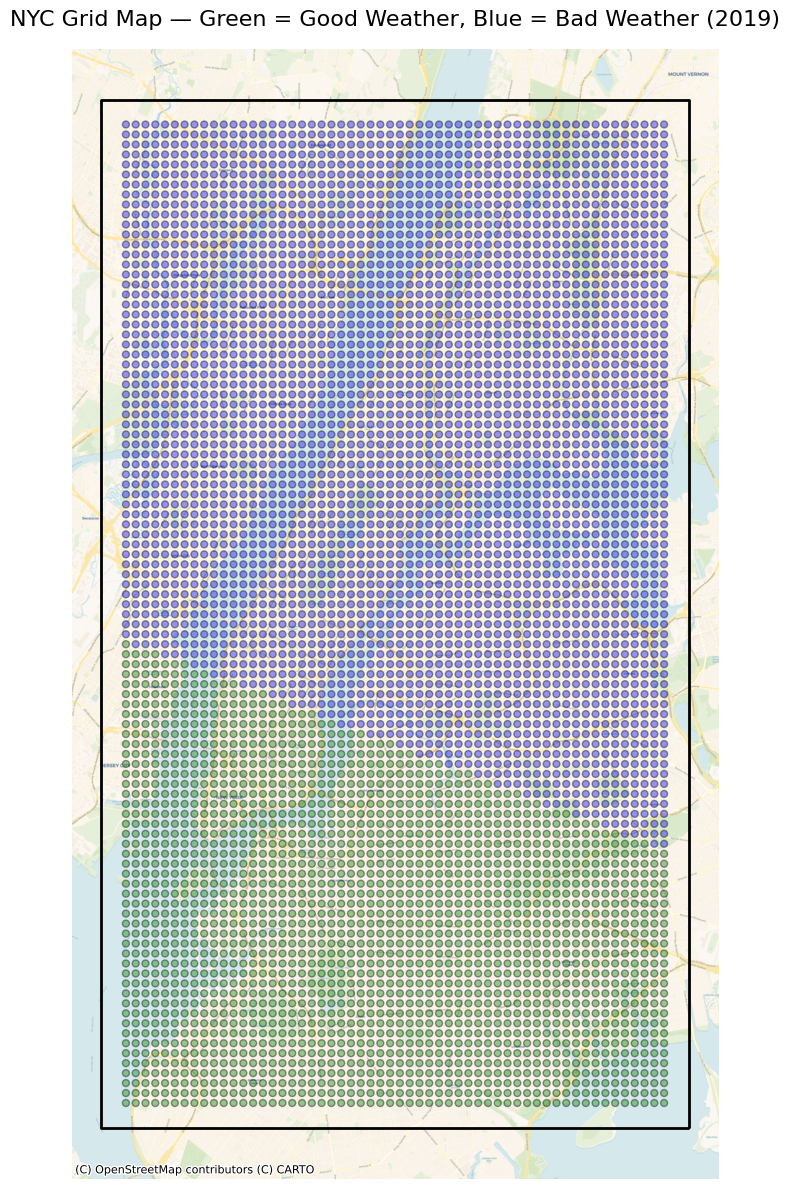

In [79]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
import contextily as ctx

# Step 1: Load data
csv_path = r"D:\\SVM\\Edit 4 SVM\\weather_grid_good_bad_matrix.csv"
df = pd.read_csv(csv_path)

# Step 2: Calculate grid center (lat/lon)
df['lat'] = (df['Min Lat'] + df['Max Lat']) / 2
df['lon'] = (df['Min Long'] + df['Max Long']) / 2

# Step 3: Compute average good weather percentage
day_cols = [col for col in df.columns if col.startswith("Day_")]
df['avg_good_weather'] = df[day_cols].mean(axis=1)

# Step 4: Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Step 5: Project to web mercator for basemap
gdf_web = gdf.to_crs(epsg=3857)

# Step 6: Calculate bounding box around all grid points
bbox = gdf_web.total_bounds
padding = 1000  # meters
bbox_box = box(bbox[0] - padding, bbox[1] - padding, bbox[2] + padding, bbox[3] + padding)
boundary = gpd.GeoDataFrame({'geometry': [bbox_box]}, crs=gdf_web.crs)

# Step 7: Plot with faded markers for base map visibility
fig, ax = plt.subplots(figsize=(14, 12))

colors = gdf_web['avg_good_weather'].apply(lambda x: 'green' if x >= 0.5 else 'blue')
gdf_web.plot(ax=ax, color=colors, edgecolor='black', markersize=25, alpha=0.4)
boundary.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, zoom=14)

ax.set_title("NYC Grid Map — Green = Good Weather, Blue = Bad Weather (2019)", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()


## Train the SVM Model 

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

In [31]:
# Load the dataset
file_path = r"D:\\SVM\\Edit 4 SVM\\wether_grid_Model.csv"
df = pd.read_csv(file_path)